> 해당 자료는 전북대학교 이영미 교수님 2023응용통계학 자료임

# 변수선택

In [2]:
dt <- data.frame(

 x1 = c(7,1,11,11,7,11,3,1,2,21,1,11,10),
 x2 = c(26,29,56,31,52,55,71,31,54,47,40,66,68),
 x3 = c(6,15,8,8,6,9,17,22,18,4,23,9,8),
 x4 = c(60,52,20,47,33,22,6,44,22,26,34,12,12),
 y = c(78.5,74.3,104.3,87.6,95.9,109.2,102.7,72.5,93.1,115.9,83.8,113.3,109.4)
)


,x1,x2,x3,x4,y
x1,1.0000000,0.2285795,-0.8241338,-0.2454451,0.7307175
x2,0.2285795,1.0000000,-0.1392424,-0.9729550,0.8162526
x3,-0.8241338,-0.1392424,1.0000000,0.0295370,-0.5346707
x4,-0.2454451,-0.9729550,0.0295370,1.0000000,-0.8213050
y,0.7307175,0.8162526,-0.5346707,-0.8213050,1.0000000


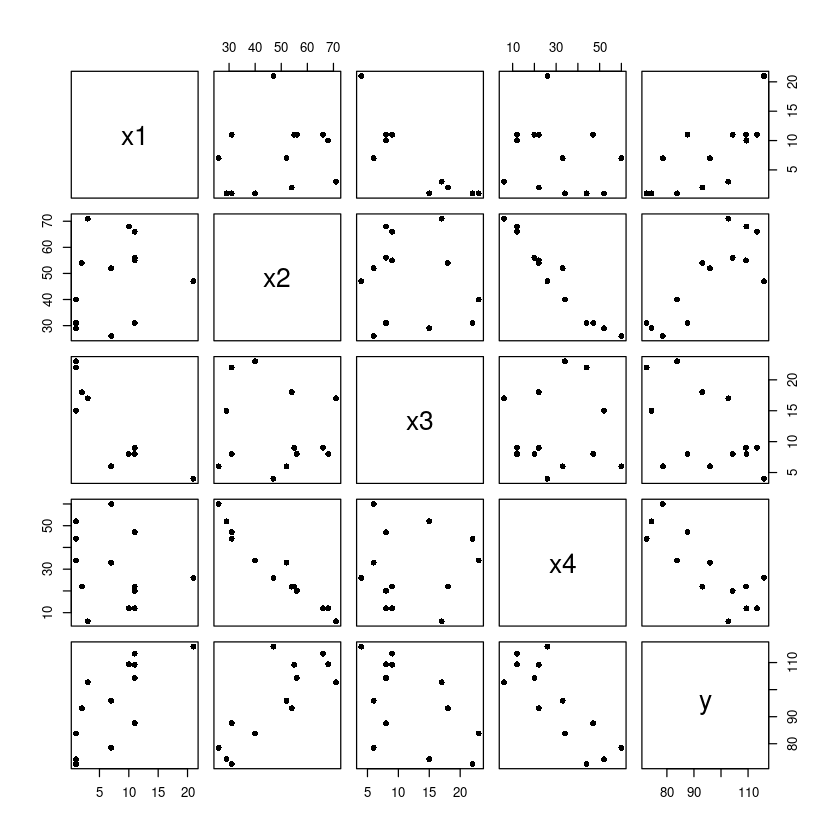

In [3]:
pairs(dt, pch=16)
cor(dt)

- Full Model : $𝑦 = 𝛽_0 + 𝛽_1𝑥_1 + 𝛽_2𝑥_2 + 𝛽_3𝑥_3 + 𝛽_4𝑥_4 + \epsilon$

In [4]:
m <- lm(y~., dt) ##FM
summary(m)


Call:
lm(formula = y ~ ., data = dt)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.1750 -1.6709  0.2508  1.3783  3.9254 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept)  62.4054    70.0710   0.891   0.3991  
x1            1.5511     0.7448   2.083   0.0708 .
x2            0.5102     0.7238   0.705   0.5009  
x3            0.1019     0.7547   0.135   0.8959  
x4           -0.1441     0.7091  -0.203   0.8441  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.446 on 8 degrees of freedom
Multiple R-squared:  0.9824,	Adjusted R-squared:  0.9736 
F-statistic: 111.5 on 4 and 8 DF,  p-value: 4.756e-07


> 모형은 유의하게 나오고 R^2도 값이 크게나오는데, 회귀계수는 하나도 유의한게 없다? 다중공산성 때문에 

## 후진제거법


In [5]:
summary(m)


Call:
lm(formula = y ~ ., data = dt)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.1750 -1.6709  0.2508  1.3783  3.9254 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept)  62.4054    70.0710   0.891   0.3991  
x1            1.5511     0.7448   2.083   0.0708 .
x2            0.5102     0.7238   0.705   0.5009  
x3            0.1019     0.7547   0.135   0.8959  
x4           -0.1441     0.7091  -0.203   0.8441  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.446 on 8 degrees of freedom
Multiple R-squared:  0.9824,	Adjusted R-squared:  0.9736 
F-statistic: 111.5 on 4 and 8 DF,  p-value: 4.756e-07


> 부분 F통계량, F통계량 = t^2 (t검정)
>
> $H_0:\beta_1= 0$
>
> 위의 `t value` 제곱하면 부분 F통계량이 됨
>
> t-value의 절대값이 가장 작은 값을 찾아주면 됨 -> x3

In [6]:
drop1(m, test = "F") #x3 제거
# m에서 F통계량 사요하여 제거한것 확인

,Df,Sum of Sq,RSS,AIC,F value,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
<none>,NA,NA,47.86364,26.94429,NA,NA
x1,1,25.9509114,73.81455,30.57588,4.33747400,0.07082169
x2,1,2.9724782,50.83612,25.72755,0.49682444,0.50090110
x3,1,0.1090900,47.97273,24.97388,0.01823347,0.89592269
x4,1,0.2469747,48.11061,25.01120,0.04127972,0.84407147


> `RSS`: SSE
>
> `F value` : $F=\dfrac{SSE_{RM}-SSE_{FM}}{SSE_{FM}/(n-p-1)}$ F값이 작을수록 유의하지 않다. 클수록 유의하다.
>
> 3번째값이 가장 작은 값을 갖다. 유의확률이 제일 크니까 변수가 제거된다.

In [7]:
m1 <- update(m, ~ . -x3)
summary(m1) #x4 제거


Call:
lm(formula = y ~ x1 + x2 + x4, data = dt)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.0919 -1.8016  0.2562  1.2818  3.8982 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  71.6483    14.1424   5.066 0.000675 ***
x1            1.4519     0.1170  12.410 5.78e-07 ***
x2            0.4161     0.1856   2.242 0.051687 .  
x4           -0.2365     0.1733  -1.365 0.205395    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.309 on 9 degrees of freedom
Multiple R-squared:  0.9823,	Adjusted R-squared:  0.9764 
F-statistic: 166.8 on 3 and 9 DF,  p-value: 3.323e-08


> $lm(y$~$x_1+x_2+x_4, dt)$ 라고 표현해도 된다.
>
> x1이 유의해졌다. (x3과 다중공산성이 심했었다)

In [8]:
drop1(m1, test = "F")

,Df,Sum of Sq,RSS,AIC,F value,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
<none>,NA,NA,47.97273,24.97388,NA,NA
x1,1,820.907402,868.88013,60.62933,154.007635,5.780764e-07
x2,1,26.789383,74.76211,28.74170,5.025865,5.168735e-02
x4,1,9.931754,57.90448,25.41999,1.863262,2.053954e-01


> Fvalue의 x4가 가장 작으므로 제거하자. 유의하지 않다.

In [9]:
m2 <- update(m1, ~ . -x4)
summary(m2) 



Call:
lm(formula = y ~ x1 + x2, data = dt)

Residuals:
   Min     1Q Median     3Q    Max 
-2.893 -1.574 -1.302  1.363  4.048 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 52.57735    2.28617   23.00 5.46e-10 ***
x1           1.46831    0.12130   12.11 2.69e-07 ***
x2           0.66225    0.04585   14.44 5.03e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.406 on 10 degrees of freedom
Multiple R-squared:  0.9787,	Adjusted R-squared:  0.9744 
F-statistic: 229.5 on 2 and 10 DF,  p-value: 4.407e-09


In [10]:
drop1(m2, test = "F")

,Df,Sum of Sq,RSS,AIC,F value,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
<none>,NA,NA,57.90448,25.41999,NA,NA
x1,1,848.4319,906.33634,59.17799,146.5227,2.692212e-07
x2,1,1207.7823,1265.68675,63.51947,208.5818,5.028960e-08


> `F value`가 작은 x1을 제거할까? 하고 보니까 통계적으로 유의하므로 제거하지 않는다.

## 전진선택법


- Start model : $𝑦 = 𝛽_0 + \epsilon$

In [11]:
m0 = lm(y ~ 1, data = dt)

In [12]:
add1(m0,
 scope = y ~ x1 + x2 + x3+ x4,
 test = "F") ## x4추가

,Df,Sum of Sq,RSS,AIC,F value,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
<none>,NA,NA,2715.7631,71.44443,NA,NA
x1,1,1450.0763,1265.6867,63.51947,12.602518,0.0045520446
x2,1,1809.4267,906.3363,59.17799,21.960605,0.0006648249
x3,1,776.3626,1939.4005,69.06740,4.403417,0.0597623242
x4,1,1831.8962,883.8669,58.85164,22.798520,0.0005762318


> F값이 크면 좋음. x4가 좋으니까 보면 유의하므로 추가하자.

In [13]:
m1 <- update(m0, ~ . +x4)
summary(m1)


Call:
lm(formula = y ~ x4, data = dt)

Residuals:
    Min      1Q  Median      3Q     Max 
-12.589  -8.228   1.495   4.726  17.524 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 117.5679     5.2622  22.342 1.62e-10 ***
x4           -0.7382     0.1546  -4.775 0.000576 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 8.964 on 11 degrees of freedom
Multiple R-squared:  0.6745,	Adjusted R-squared:  0.645 
F-statistic:  22.8 on 1 and 11 DF,  p-value: 0.0005762


In [14]:
add1(m1,
 scope = y ~ x1 + x2 + x3+ x4,
 test = "F") ## x1추가

,Df,Sum of Sq,RSS,AIC,F value,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
<none>,NA,NA,883.86692,58.85164,NA,NA
x1,1,809.10480,74.76211,28.74170,108.2239093,1.105281e-06
x2,1,14.98679,868.88013,60.62933,0.1724839,6.866842e-01
x3,1,708.12891,175.73800,39.85258,40.2945802,8.375467e-05


> x1의 F갑싱 제일 크고 유의하므로 추가

In [15]:
m2 <- update(m1, ~ . +x1)
summary(m2)



Call:
lm(formula = y ~ x4 + x1, data = dt)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.0234 -1.4737  0.1371  1.7305  3.7701 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 103.09738    2.12398   48.54 3.32e-13 ***
x4           -0.61395    0.04864  -12.62 1.81e-07 ***
x1            1.43996    0.13842   10.40 1.11e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.734 on 10 degrees of freedom
Multiple R-squared:  0.9725,	Adjusted R-squared:  0.967 
F-statistic: 176.6 on 2 and 10 DF,  p-value: 1.581e-08


In [16]:
add1(m2,
 scope = y ~ x1 + x2 + x3+ x4,
 test = "F") ## stop

,Df,Sum of Sq,RSS,AIC,F value,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
<none>,NA,NA,74.76211,28.74170,NA,NA
x2,1,26.78938,47.97273,24.97388,5.025865,0.05168735
x3,1,23.92599,50.83612,25.72755,4.235846,0.06969226


> x2의 F값이 더 크지만, pr값이 애매해. 유의수준  a=0.05면 유의하지 않다. 모형에 포함될 수 없으므로 멈춘다.
>
> 최종 모형은 x1과 x4를 선택한 모형

## 단계적선택법

In [7]:
m0 = lm(y ~ 1, data = dt)
# 절편먼저 시작

In [18]:
add1(m0,
 scope = y ~ x1 + x2 + x3+ x4,
 test = "F") ## x4추가


,Df,Sum of Sq,RSS,AIC,F value,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
<none>,NA,NA,2715.7631,71.44443,NA,NA
x1,1,1450.0763,1265.6867,63.51947,12.602518,0.0045520446
x2,1,1809.4267,906.3363,59.17799,21.960605,0.0006648249
x3,1,776.3626,1939.4005,69.06740,4.403417,0.0597623242
x4,1,1831.8962,883.8669,58.85164,22.798520,0.0005762318


In [19]:
m1 <- update(m0, ~ . +x4)
summary(m1)


Call:
lm(formula = y ~ x4, data = dt)

Residuals:
    Min      1Q  Median      3Q     Max 
-12.589  -8.228   1.495   4.726  17.524 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 117.5679     5.2622  22.342 1.62e-10 ***
x4           -0.7382     0.1546  -4.775 0.000576 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 8.964 on 11 degrees of freedom
Multiple R-squared:  0.6745,	Adjusted R-squared:  0.645 
F-statistic:  22.8 on 1 and 11 DF,  p-value: 0.0005762


In [20]:
add1(m1,
 scope = y ~ x1 + x2 + x3+ x4,
 test = "F") ## x1추가


,Df,Sum of Sq,RSS,AIC,F value,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
<none>,NA,NA,883.86692,58.85164,NA,NA
x1,1,809.10480,74.76211,28.74170,108.2239093,1.105281e-06
x2,1,14.98679,868.88013,60.62933,0.1724839,6.866842e-01
x3,1,708.12891,175.73800,39.85258,40.2945802,8.375467e-05


In [21]:
m2 <- update(m1, ~ . +x1)

In [22]:
drop1(m2, test = "F") #제거 없음

,Df,Sum of Sq,RSS,AIC,F value,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
<none>,NA,NA,74.76211,28.74170,NA,NA
x4,1,1190.9246,1265.68675,63.51947,159.2952,1.814890e-07
x1,1,809.1048,883.86692,58.85164,108.2239,1.105281e-06


> x1,x4 유의하니까 그대로 가져가자

In [23]:
add1(m2,
 scope = y ~ x1 + x2 + x3+ x4,
 test = "F") ## x2추가

,Df,Sum of Sq,RSS,AIC,F value,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
<none>,NA,NA,74.76211,28.74170,NA,NA
x2,1,26.78938,47.97273,24.97388,5.025865,0.05168735
x3,1,23.92599,50.83612,25.72755,4.235846,0.06969226


> 유의수준 a=0.1로 보자

In [24]:
m3 <- update(m2, ~ . +x2)
summary(m3) 



Call:
lm(formula = y ~ x4 + x1 + x2, data = dt)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.0919 -1.8016  0.2562  1.2818  3.8982 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  71.6483    14.1424   5.066 0.000675 ***
x4           -0.2365     0.1733  -1.365 0.205395    
x1            1.4519     0.1170  12.410 5.78e-07 ***
x2            0.4161     0.1856   2.242 0.051687 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.309 on 9 degrees of freedom
Multiple R-squared:  0.9823,	Adjusted R-squared:  0.9764 
F-statistic: 166.8 on 3 and 9 DF,  p-value: 3.323e-08


In [25]:
drop1(m3, test="F") #x4 제거

,Df,Sum of Sq,RSS,AIC,F value,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
<none>,NA,NA,47.97273,24.97388,NA,NA
x4,1,9.931754,57.90448,25.41999,1.863262,2.053954e-01
x1,1,820.907402,868.88013,60.62933,154.007635,5.780764e-07
x2,1,26.789383,74.76211,28.74170,5.025865,5.168735e-02


> x2를 추가했기 때문에 x2는 보지 않고 x1과 x4만 보면 된다

In [26]:
m4 <- update(m3, ~ . -x4)
summary(m4)


Call:
lm(formula = y ~ x1 + x2, data = dt)

Residuals:
   Min     1Q Median     3Q    Max 
-2.893 -1.574 -1.302  1.363  4.048 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 52.57735    2.28617   23.00 5.46e-10 ***
x1           1.46831    0.12130   12.11 2.69e-07 ***
x2           0.66225    0.04585   14.44 5.03e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.406 on 10 degrees of freedom
Multiple R-squared:  0.9787,	Adjusted R-squared:  0.9744 
F-statistic: 229.5 on 2 and 10 DF,  p-value: 4.407e-09


In [27]:
add1(m4,
 scope = y ~ x1 + x2 + x3+ x4,
 test = "F") #stop

,Df,Sum of Sq,RSS,AIC,F value,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
<none>,NA,NA,57.90448,25.41999,NA,NA
x3,1,9.793869,48.11061,25.01120,1.832128,0.2088895
x4,1,9.931754,47.97273,24.97388,1.863262,0.2053954


## AIC를 이용한 변수 선택법

- 모델 선택시 AIC가 작은 모델을 선택

### Backward - AIC

- 후진제거법 AIC로 해보기

- step 함수: AIC가 기준임

In [28]:
model_back = step(m, direction = "backward")
summary(model_back)

Start:  AIC=26.94
y ~ x1 + x2 + x3 + x4

       Df Sum of Sq    RSS    AIC
- x3    1    0.1091 47.973 24.974
- x4    1    0.2470 48.111 25.011
- x2    1    2.9725 50.836 25.728
<none>              47.864 26.944
- x1    1   25.9509 73.815 30.576

Step:  AIC=24.97
y ~ x1 + x2 + x4

       Df Sum of Sq    RSS    AIC
<none>               47.97 24.974
- x4    1      9.93  57.90 25.420
- x2    1     26.79  74.76 28.742
- x1    1    820.91 868.88 60.629



Call:
lm(formula = y ~ x1 + x2 + x4, data = dt)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.0919 -1.8016  0.2562  1.2818  3.8982 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  71.6483    14.1424   5.066 0.000675 ***
x1            1.4519     0.1170  12.410 5.78e-07 ***
x2            0.4161     0.1856   2.242 0.051687 .  
x4           -0.2365     0.1733  -1.365 0.205395    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.309 on 9 degrees of freedom
Multiple R-squared:  0.9823,	Adjusted R-squared:  0.9764 
F-statistic: 166.8 on 3 and 9 DF,  p-value: 3.323e-08


```R
     Df Sum of Sq    RSS    AIC
- x3    1    0.1091 47.973 24.974
- x4    1    0.2470 48.111 25.011
- x2    1    2.9725 50.836 25.728
<none>              47.864 26.944
- x1    1   25.9509 73.815 30.576
```

-x3을 뺐을때 aic..
-x4을 뺏을때 aic...

- AIC가 작으면 작을수록 좋다.그래서 x3빼자



- x2와 x4가 애매하긴 하지만,, 

### Forward - AIC

- 전진선택법

In [29]:
model_forward = step(
 m0,
 scope = y ~ x1 + x2 + x3+ x4,
 direction = "forward")
summary(model_forward)

Start:  AIC=71.44
y ~ 1

       Df Sum of Sq     RSS    AIC
+ x4    1   1831.90  883.87 58.852
+ x2    1   1809.43  906.34 59.178
+ x1    1   1450.08 1265.69 63.519
+ x3    1    776.36 1939.40 69.067
<none>              2715.76 71.444

Step:  AIC=58.85
y ~ x4

       Df Sum of Sq    RSS    AIC
+ x1    1    809.10  74.76 28.742
+ x3    1    708.13 175.74 39.853
<none>              883.87 58.852
+ x2    1     14.99 868.88 60.629

Step:  AIC=28.74
y ~ x4 + x1

       Df Sum of Sq    RSS    AIC
+ x2    1    26.789 47.973 24.974
+ x3    1    23.926 50.836 25.728
<none>              74.762 28.742

Step:  AIC=24.97
y ~ x4 + x1 + x2

       Df Sum of Sq    RSS    AIC
<none>              47.973 24.974
+ x3    1   0.10909 47.864 26.944



Call:
lm(formula = y ~ x4 + x1 + x2, data = dt)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.0919 -1.8016  0.2562  1.2818  3.8982 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  71.6483    14.1424   5.066 0.000675 ***
x4           -0.2365     0.1733  -1.365 0.205395    
x1            1.4519     0.1170  12.410 5.78e-07 ***
x2            0.4161     0.1856   2.242 0.051687 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.309 on 9 degrees of freedom
Multiple R-squared:  0.9823,	Adjusted R-squared:  0.9764 
F-statistic: 166.8 on 3 and 9 DF,  p-value: 3.323e-08


### Step - AIC

In [30]:
model_step = step(
 m0,
 scope = y ~ x1 + x2 + x3+ x4,
 direction = "both")
summary(model_step)

Start:  AIC=71.44
y ~ 1

       Df Sum of Sq     RSS    AIC
+ x4    1   1831.90  883.87 58.852
+ x2    1   1809.43  906.34 59.178
+ x1    1   1450.08 1265.69 63.519
+ x3    1    776.36 1939.40 69.067
<none>              2715.76 71.444

Step:  AIC=58.85
y ~ x4

       Df Sum of Sq     RSS    AIC
+ x1    1    809.10   74.76 28.742
+ x3    1    708.13  175.74 39.853
<none>               883.87 58.852
+ x2    1     14.99  868.88 60.629
- x4    1   1831.90 2715.76 71.444

Step:  AIC=28.74
y ~ x4 + x1

       Df Sum of Sq     RSS    AIC
+ x2    1     26.79   47.97 24.974
+ x3    1     23.93   50.84 25.728
<none>                74.76 28.742
- x1    1    809.10  883.87 58.852
- x4    1   1190.92 1265.69 63.519

Step:  AIC=24.97
y ~ x4 + x1 + x2

       Df Sum of Sq    RSS    AIC
<none>               47.97 24.974
- x4    1      9.93  57.90 25.420
+ x3    1      0.11  47.86 26.944
- x2    1     26.79  74.76 28.742
- x1    1    820.91 868.88 60.629



Call:
lm(formula = y ~ x4 + x1 + x2, data = dt)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.0919 -1.8016  0.2562  1.2818  3.8982 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  71.6483    14.1424   5.066 0.000675 ***
x4           -0.2365     0.1733  -1.365 0.205395    
x1            1.4519     0.1170  12.410 5.78e-07 ***
x2            0.4161     0.1856   2.242 0.051687 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.309 on 9 degrees of freedom
Multiple R-squared:  0.9823,	Adjusted R-squared:  0.9764 
F-statistic: 166.8 on 3 and 9 DF,  p-value: 3.323e-08


- 추가하는거랑 빼는거랑 동시에 진행

## regsubsets

In [50]:
m_full <-lm(y~.,dt)
summary(m_full)


Call:
lm(formula = y ~ ., data = dt)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.1750 -1.6709  0.2508  1.3783  3.9254 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept)  62.4054    70.0710   0.891   0.3991  
x1            1.5511     0.7448   2.083   0.0708 .
x2            0.5102     0.7238   0.705   0.5009  
x3            0.1019     0.7547   0.135   0.8959  
x4           -0.1441     0.7091  -0.203   0.8441  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.446 on 8 degrees of freedom
Multiple R-squared:  0.9824,	Adjusted R-squared:  0.9736 
F-statistic: 111.5 on 4 and 8 DF,  p-value: 4.756e-07


### nbest=1

In [52]:
fit <- regsubsets(y~., data=dt, nbest=1, nvmax=9, method='exhaustive',)

In [53]:
summary(fit)

Subset selection object
Call: regsubsets.formula(y ~ ., data = dt, nbest = 1, nvmax = 9, method = "exhaustive", 
    )
4 Variables  (and intercept)
   Forced in Forced out
x1     FALSE      FALSE
x2     FALSE      FALSE
x3     FALSE      FALSE
x4     FALSE      FALSE
1 subsets of each size up to 4
Selection Algorithm: exhaustive
         x1  x2  x3  x4 
1  ( 1 ) " " " " " " "*"
2  ( 1 ) "*" "*" " " " "
3  ( 1 ) "*" "*" " " "*"
4  ( 1 ) "*" "*" "*" "*"

- 설명변수 1개, 2개, 3개 , 4개썼을때 제일 좋은 모형을 불러와 :nbest=1

In [54]:
with(summary(fit), round(cbind(which,rss,rsq,adjr2,cp,bic),3))

,(Intercept),x1,x2,x3,x4,rss,rsq,adjr2,cp,bic
1,1,0,0,0,1,883.867,0.675,0.645,138.731,-9.463
2,1,1,1,0,0,57.904,0.979,0.974,2.678,-42.330
3,1,1,1,0,1,47.973,0.982,0.976,3.018,-42.211
4,1,1,1,1,1,47.864,0.982,0.974,5.000,-39.675


### nbest=2

In [55]:
fit <- regsubsets(y~., data=dt, nbest=2, nvmax=9, method='exhaustive',)

In [56]:
summary(fit)

Subset selection object
Call: regsubsets.formula(y ~ ., data = dt, nbest = 2, nvmax = 9, method = "exhaustive", 
    )
4 Variables  (and intercept)
   Forced in Forced out
x1     FALSE      FALSE
x2     FALSE      FALSE
x3     FALSE      FALSE
x4     FALSE      FALSE
2 subsets of each size up to 4
Selection Algorithm: exhaustive
         x1  x2  x3  x4 
1  ( 1 ) " " " " " " "*"
1  ( 2 ) " " "*" " " " "
2  ( 1 ) "*" "*" " " " "
2  ( 2 ) "*" " " " " "*"
3  ( 1 ) "*" "*" " " "*"
3  ( 2 ) "*" "*" "*" " "
4  ( 1 ) "*" "*" "*" "*"

- 좋았던걸 2개씩 리턴

### nbest=6

In [57]:
fit <- regsubsets(y~., data=dt, nbest=6, nvmax=9, method='exhaustive',)
summary(fit)

Subset selection object
Call: regsubsets.formula(y ~ ., data = dt, nbest = 6, nvmax = 9, method = "exhaustive", 
    )
4 Variables  (and intercept)
   Forced in Forced out
x1     FALSE      FALSE
x2     FALSE      FALSE
x3     FALSE      FALSE
x4     FALSE      FALSE
6 subsets of each size up to 4
Selection Algorithm: exhaustive
         x1  x2  x3  x4 
1  ( 1 ) " " " " " " "*"
1  ( 2 ) " " "*" " " " "
1  ( 3 ) "*" " " " " " "
1  ( 4 ) " " " " "*" " "
2  ( 1 ) "*" "*" " " " "
2  ( 2 ) "*" " " " " "*"
2  ( 3 ) " " " " "*" "*"
2  ( 4 ) " " "*" "*" " "
2  ( 5 ) " " "*" " " "*"
2  ( 6 ) "*" " " "*" " "
3  ( 1 ) "*" "*" " " "*"
3  ( 2 ) "*" "*" "*" " "
3  ( 3 ) "*" " " "*" "*"
3  ( 4 ) " " "*" "*" "*"
4  ( 1 ) "*" "*" "*" "*"

In [58]:
with(summary(fit), round(cbind(which,rss,rsq,adjr2,cp,bic),3))

,(Intercept),x1,x2,x3,x4,rss,rsq,adjr2,cp,bic
1,1,0,0,0,1,883.867,0.675,0.645,138.731,-9.463
1,1,0,1,0,0,906.336,0.666,0.636,142.486,-9.137
1,1,1,0,0,0,1265.687,0.534,0.492,202.549,-4.795
1,1,0,0,1,0,1939.400,0.286,0.221,315.154,0.753
2,1,1,1,0,0,57.904,0.979,0.974,2.678,-42.330
2,1,1,0,0,1,74.762,0.972,0.967,5.496,-39.008
2,1,0,0,1,1,175.738,0.935,0.922,22.373,-27.897
2,1,0,1,1,0,415.443,0.847,0.816,62.438,-16.712
2,1,0,1,0,1,868.880,0.680,0.616,138.226,-7.120
2,1,1,0,1,0,1227.072,0.548,0.458,198.095,-2.633


### nvmax=2

- 설명변수 최대 2개까지만

In [59]:
fit <- regsubsets(y~., data=dt, nbest=6, nvmax=2, method='exhaustive',)
summary(fit)

Subset selection object
Call: regsubsets.formula(y ~ ., data = dt, nbest = 6, nvmax = 2, method = "exhaustive", 
    )
4 Variables  (and intercept)
   Forced in Forced out
x1     FALSE      FALSE
x2     FALSE      FALSE
x3     FALSE      FALSE
x4     FALSE      FALSE
6 subsets of each size up to 2
Selection Algorithm: exhaustive
         x1  x2  x3  x4 
1  ( 1 ) " " " " " " "*"
1  ( 2 ) " " "*" " " " "
1  ( 3 ) "*" " " " " " "
1  ( 4 ) " " " " "*" " "
2  ( 1 ) "*" "*" " " " "
2  ( 2 ) "*" " " " " "*"
2  ( 3 ) " " " " "*" "*"
2  ( 4 ) " " "*" "*" " "
2  ( 5 ) " " "*" " " "*"
2  ( 6 ) "*" " " "*" " "

# 자동차 연비 자료 분석

In [34]:
str(mtcars)

'data.frame':	32 obs. of  11 variables:
 $ mpg : num  21 21 22.8 21.4 18.7 18.1 14.3 24.4 22.8 19.2 ...
 $ cyl : num  6 6 4 6 8 6 8 4 4 6 ...
 $ disp: num  160 160 108 258 360 ...
 $ hp  : num  110 110 93 110 175 105 245 62 95 123 ...
 $ drat: num  3.9 3.9 3.85 3.08 3.15 2.76 3.21 3.69 3.92 3.92 ...
 $ wt  : num  2.62 2.88 2.32 3.21 3.44 ...
 $ qsec: num  16.5 17 18.6 19.4 17 ...
 $ vs  : num  0 0 1 1 0 1 0 1 1 1 ...
 $ am  : num  1 1 1 0 0 0 0 0 0 0 ...
 $ gear: num  4 4 4 3 3 3 3 4 4 4 ...
 $ carb: num  4 4 1 1 2 1 4 2 2 4 ...


In [35]:
round(cor(mtcars),2)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
mpg,1.00,-0.85,-0.85,-0.78,0.68,-0.87,0.42,0.66,0.60,0.48,-0.55
cyl,-0.85,1.00,0.90,0.83,-0.70,0.78,-0.59,-0.81,-0.52,-0.49,0.53
disp,-0.85,0.90,1.00,0.79,-0.71,0.89,-0.43,-0.71,-0.59,-0.56,0.39
hp,-0.78,0.83,0.79,1.00,-0.45,0.66,-0.71,-0.72,-0.24,-0.13,0.75
drat,0.68,-0.70,-0.71,-0.45,1.00,-0.71,0.09,0.44,0.71,0.70,-0.09
wt,-0.87,0.78,0.89,0.66,-0.71,1.00,-0.17,-0.55,-0.69,-0.58,0.43
qsec,0.42,-0.59,-0.43,-0.71,0.09,-0.17,1.00,0.74,-0.23,-0.21,-0.66
vs,0.66,-0.81,-0.71,-0.72,0.44,-0.55,0.74,1.00,0.17,0.21,-0.57
am,0.60,-0.52,-0.59,-0.24,0.71,-0.69,-0.23,0.17,1.00,0.79,0.06
gear,0.48,-0.49,-0.56,-0.13,0.70,-0.58,-0.21,0.21,0.79,1.00,0.27


> mpg(연비)가 y이고 y와 상관관계가 가장 높은것은 wt(차무게), hp(마력)

In [36]:
m_full <- lm(mpg~., mtcars)
summary(m_full)



Call:
lm(formula = mpg ~ ., data = mtcars)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.4506 -1.6044 -0.1196  1.2193  4.6271 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept) 12.30337   18.71788   0.657   0.5181  
cyl         -0.11144    1.04502  -0.107   0.9161  
disp         0.01334    0.01786   0.747   0.4635  
hp          -0.02148    0.02177  -0.987   0.3350  
drat         0.78711    1.63537   0.481   0.6353  
wt          -3.71530    1.89441  -1.961   0.0633 .
qsec         0.82104    0.73084   1.123   0.2739  
vs           0.31776    2.10451   0.151   0.8814  
am           2.52023    2.05665   1.225   0.2340  
gear         0.65541    1.49326   0.439   0.6652  
carb        -0.19942    0.82875  -0.241   0.8122  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.65 on 21 degrees of freedom
Multiple R-squared:  0.869,	Adjusted R-squared:  0.8066 
F-statistic: 13.93 on 10 and 21 DF,  p-value: 3.793e-07

> 다중공산성 떄문에 회귀계수는 다 유의하지 않게 나옴

In [40]:
library(leaps)

In [43]:
fit<-regsubsets(mpg~., data=mtcars, nbest=1,nvmax=9,
# method=c("exhaustive"(모든가능한),"backward", "forward", "seqrep")
method='exhaustive',
)


In [42]:
summary(fit)


Subset selection object
Call: regsubsets.formula(mpg ~ ., data = mtcars, nbest = 1, nvmax = 9, 
    method = "exhaustive", )
10 Variables  (and intercept)
     Forced in Forced out
cyl      FALSE      FALSE
disp     FALSE      FALSE
hp       FALSE      FALSE
drat     FALSE      FALSE
wt       FALSE      FALSE
qsec     FALSE      FALSE
vs       FALSE      FALSE
am       FALSE      FALSE
gear     FALSE      FALSE
carb     FALSE      FALSE
1 subsets of each size up to 9
Selection Algorithm: exhaustive
         cyl disp hp  drat wt  qsec vs  am  gear carb
1  ( 1 ) " " " "  " " " "  "*" " "  " " " " " "  " " 
2  ( 1 ) "*" " "  " " " "  "*" " "  " " " " " "  " " 
3  ( 1 ) " " " "  " " " "  "*" "*"  " " "*" " "  " " 
4  ( 1 ) " " " "  "*" " "  "*" "*"  " " "*" " "  " " 
5  ( 1 ) " " "*"  "*" " "  "*" "*"  " " "*" " "  " " 
6  ( 1 ) " " "*"  "*" "*"  "*" "*"  " " "*" " "  " " 
7  ( 1 ) " " "*"  "*" "*"  "*" "*"  " " "*" "*"  " " 
8  ( 1 ) " " "*"  "*" "*"  "*" "*"  " " "*" "*"  "*" 
9  ( 1 ) "

> 설명변수 2개를 쓴거는 $_{10}C_{2}=45$개 모형을 만들 수 있음. $R^2$을 봐서 좋은걸 보면 cyl이랑 wt쓴게 제일 좋은 모형이야.

> 설명변수 1개를 쓴다면 그 중에서 wt쓴거의 $R^2$가 제일 좋아.

> 설명변수 3개는 wt,qsec,am 쓴게 제일 좋아

- `Forced in`: 나는 이 변수가 꼭 들어갔으면 좋겠어 

- `Forced out` : 나는 이변수가 꼭 뺐으면 좋겠어

- 10개 쓴거가 full model 이고 설명변수를 1개 2개 3개 쓴...

In [44]:
with(summary(fit),
     round(cbind(which,rss,rsq,adjr2,cp,bic),3))

,(Intercept),cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,rss,rsq,adjr2,cp,bic
1,1,0,0,0,0,1,0,0,0,0,0,278.322,0.753,0.745,11.627,-37.795
2,1,1,0,0,0,1,0,0,0,0,0,191.172,0.830,0.819,1.219,-46.348
3,1,0,0,0,0,1,1,0,1,0,0,169.286,0.850,0.834,0.103,-46.773
4,1,0,0,1,0,1,1,0,1,0,0,160.066,0.858,0.837,0.790,-45.099
5,1,0,1,1,0,1,1,0,1,0,0,153.438,0.864,0.838,1.846,-42.987
6,1,0,1,1,1,1,1,0,1,0,0,150.093,0.867,0.835,3.370,-40.227
7,1,0,1,1,1,1,1,0,1,1,0,148.528,0.868,0.830,5.147,-37.096
8,1,0,1,1,1,1,1,0,1,1,1,147.843,0.869,0.823,7.050,-33.779
9,1,0,1,1,1,1,1,1,1,1,1,147.574,0.869,0.815,9.011,-30.371


`which,rss,rsq,adjr2,cp,bic`

- which:어떤 변수를 썼는지?

- rss: sse 작을 수록 좋다. -> `147.574` 제일작은데, 원래 제일 복잡한 모형이 제일 작다. 감소하는 차이를 보자.. 

- rsq : $R^2$ 크면 좋은데 둔화되는 점까지 보자.

- adjr2 : $R^2_{adj}$ 크면 좋다. `0.838` 5개

- cp: 작으면 좋다. $cp \leq p+1$ `0.103` 3개

- bic: 작으면 좋다. `-46.773` 3개


> 3개를 쓰는게 좋을 거 같다.

In [45]:
fit_3<-lm(mpg~wt+qsec+am,mtcars)
summary(fit_3)


Call:
lm(formula = mpg ~ wt + qsec + am, data = mtcars)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.4811 -1.5555 -0.7257  1.4110  4.6610 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   9.6178     6.9596   1.382 0.177915    
wt           -3.9165     0.7112  -5.507 6.95e-06 ***
qsec          1.2259     0.2887   4.247 0.000216 ***
am            2.9358     1.4109   2.081 0.046716 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.459 on 28 degrees of freedom
Multiple R-squared:  0.8497,	Adjusted R-squared:  0.8336 
F-statistic: 52.75 on 3 and 28 DF,  p-value: 1.21e-11


In [46]:
fit_4<-lm(mpg~hp+wt+qsec+am,mtcars)
summary(fit_4)


Call:
lm(formula = mpg ~ hp + wt + qsec + am, data = mtcars)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.4975 -1.5902 -0.1122  1.1795  4.5404 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept) 17.44019    9.31887   1.871  0.07215 . 
hp          -0.01765    0.01415  -1.247  0.22309   
wt          -3.23810    0.88990  -3.639  0.00114 **
qsec         0.81060    0.43887   1.847  0.07573 . 
am           2.92550    1.39715   2.094  0.04579 * 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.435 on 27 degrees of freedom
Multiple R-squared:  0.8579,	Adjusted R-squared:  0.8368 
F-statistic: 40.74 on 4 and 27 DF,  p-value: 4.589e-11


In [48]:
fit<-regsubsets(mpg~., data=mtcars, nbest=1,nvmax=9,
# method=c("exhaustive"(모든가능한),"backward", "forward", "seqrep")
method='backward',
)
summary(fit)

Subset selection object
Call: regsubsets.formula(mpg ~ ., data = mtcars, nbest = 1, nvmax = 9, 
    method = "backward", )
10 Variables  (and intercept)
     Forced in Forced out
cyl      FALSE      FALSE
disp     FALSE      FALSE
hp       FALSE      FALSE
drat     FALSE      FALSE
wt       FALSE      FALSE
qsec     FALSE      FALSE
vs       FALSE      FALSE
am       FALSE      FALSE
gear     FALSE      FALSE
carb     FALSE      FALSE
1 subsets of each size up to 9
Selection Algorithm: backward
         cyl disp hp  drat wt  qsec vs  am  gear carb
1  ( 1 ) " " " "  " " " "  "*" " "  " " " " " "  " " 
2  ( 1 ) " " " "  " " " "  "*" "*"  " " " " " "  " " 
3  ( 1 ) " " " "  " " " "  "*" "*"  " " "*" " "  " " 
4  ( 1 ) " " " "  "*" " "  "*" "*"  " " "*" " "  " " 
5  ( 1 ) " " "*"  "*" " "  "*" "*"  " " "*" " "  " " 
6  ( 1 ) " " "*"  "*" "*"  "*" "*"  " " "*" " "  " " 
7  ( 1 ) " " "*"  "*" "*"  "*" "*"  " " "*" "*"  " " 
8  ( 1 ) " " "*"  "*" "*"  "*" "*"  " " "*" "*"  "*" 
9  ( 1 ) " " "

- 10번째부터 시작해서 거꾸로 올라감. 맨처음에 cyl이 빠지고 9개

- 그다음 vs가 빠짐

- 그다음 carb가 빠짐.


In [60]:
fit<-regsubsets(mpg~., data=mtcars, nbest=45,nvmax=9,
method='exhaustive',
)
summary(fit)

ERROR: Error in leaps.exhaustive(a, really.big): Exhaustive search will be S L O W, must specify really.big=T


- nbest값을 너무 크게 주면 값이 너무 많아져서 에러메시지가뜬다. 

In [61]:
fit<-regsubsets(mpg~., data=mtcars, nbest=45,nvmax=9,
method='exhaustive', really.big=T
)
summary(fit)

Subset selection object
Call: regsubsets.formula(mpg ~ ., data = mtcars, nbest = 45, nvmax = 9, 
    method = "exhaustive", really.big = T)
10 Variables  (and intercept)
     Forced in Forced out
cyl      FALSE      FALSE
disp     FALSE      FALSE
hp       FALSE      FALSE
drat     FALSE      FALSE
wt       FALSE      FALSE
qsec     FALSE      FALSE
vs       FALSE      FALSE
am       FALSE      FALSE
gear     FALSE      FALSE
carb     FALSE      FALSE
45 subsets of each size up to 9
Selection Algorithm: exhaustive
          cyl disp hp  drat wt  qsec vs  am  gear carb
1  ( 1 )  " " " "  " " " "  "*" " "  " " " " " "  " " 
1  ( 2 )  "*" " "  " " " "  " " " "  " " " " " "  " " 
1  ( 3 )  " " "*"  " " " "  " " " "  " " " " " "  " " 
1  ( 4 )  " " " "  "*" " "  " " " "  " " " " " "  " " 
1  ( 5 )  " " " "  " " "*"  " " " "  " " " " " "  " " 
1  ( 6 )  " " " "  " " " "  " " " "  "*" " " " "  " " 
1  ( 7 )  " " " "  " " " "  " " " "  " " "*" " "  " " 
1  ( 8 )  " " " "  " " " "  " " " "  " "

In [63]:
fit<-regsubsets(mpg~., data=mtcars, nbest=1,
method='backward',
)
summary(fit)
with(summary(fit),
     round(cbind(which,rss,rsq,adjr2,cp,bic),3))

Subset selection object
Call: regsubsets.formula(mpg ~ ., data = mtcars, nbest = 1, method = "backward", 
    )
10 Variables  (and intercept)
     Forced in Forced out
cyl      FALSE      FALSE
disp     FALSE      FALSE
hp       FALSE      FALSE
drat     FALSE      FALSE
wt       FALSE      FALSE
qsec     FALSE      FALSE
vs       FALSE      FALSE
am       FALSE      FALSE
gear     FALSE      FALSE
carb     FALSE      FALSE
1 subsets of each size up to 8
Selection Algorithm: backward
         cyl disp hp  drat wt  qsec vs  am  gear carb
1  ( 1 ) " " " "  " " " "  "*" " "  " " " " " "  " " 
2  ( 1 ) " " " "  " " " "  "*" "*"  " " " " " "  " " 
3  ( 1 ) " " " "  " " " "  "*" "*"  " " "*" " "  " " 
4  ( 1 ) " " " "  "*" " "  "*" "*"  " " "*" " "  " " 
5  ( 1 ) " " "*"  "*" " "  "*" "*"  " " "*" " "  " " 
6  ( 1 ) " " "*"  "*" "*"  "*" "*"  " " "*" " "  " " 
7  ( 1 ) " " "*"  "*" "*"  "*" "*"  " " "*" "*"  " " 
8  ( 1 ) " " "*"  "*" "*"  "*" "*"  " " "*" "*"  "*" 

,(Intercept),cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,rss,rsq,adjr2,cp,bic
1,1,0,0,0,0,1,0,0,0,0,0,278.322,0.753,0.745,11.627,-37.795
2,1,0,0,0,0,1,1,0,0,0,0,195.464,0.826,0.814,1.830,-45.638
3,1,0,0,0,0,1,1,0,1,0,0,169.286,0.850,0.834,0.103,-46.773
4,1,0,0,1,0,1,1,0,1,0,0,160.066,0.858,0.837,0.790,-45.099
5,1,0,1,1,0,1,1,0,1,0,0,153.438,0.864,0.838,1.846,-42.987
6,1,0,1,1,1,1,1,0,1,0,0,150.093,0.867,0.835,3.370,-40.227
7,1,0,1,1,1,1,1,0,1,1,0,148.528,0.868,0.830,5.147,-37.096
8,1,0,1,1,1,1,1,0,1,1,1,147.843,0.869,0.823,7.050,-33.779


In [64]:
fit<-regsubsets(mpg~., data=mtcars, nbest=1,
method='forward',
)
summary(fit)
with(summary(fit),
     round(cbind(which,rss,rsq,adjr2,cp,bic),3))

Subset selection object
Call: regsubsets.formula(mpg ~ ., data = mtcars, nbest = 1, method = "forward", 
    )
10 Variables  (and intercept)
     Forced in Forced out
cyl      FALSE      FALSE
disp     FALSE      FALSE
hp       FALSE      FALSE
drat     FALSE      FALSE
wt       FALSE      FALSE
qsec     FALSE      FALSE
vs       FALSE      FALSE
am       FALSE      FALSE
gear     FALSE      FALSE
carb     FALSE      FALSE
1 subsets of each size up to 8
Selection Algorithm: forward
         cyl disp hp  drat wt  qsec vs  am  gear carb
1  ( 1 ) " " " "  " " " "  "*" " "  " " " " " "  " " 
2  ( 1 ) "*" " "  " " " "  "*" " "  " " " " " "  " " 
3  ( 1 ) "*" " "  "*" " "  "*" " "  " " " " " "  " " 
4  ( 1 ) "*" " "  "*" " "  "*" " "  " " "*" " "  " " 
5  ( 1 ) "*" " "  "*" " "  "*" "*"  " " "*" " "  " " 
6  ( 1 ) "*" "*"  "*" " "  "*" "*"  " " "*" " "  " " 
7  ( 1 ) "*" "*"  "*" "*"  "*" "*"  " " "*" " "  " " 
8  ( 1 ) "*" "*"  "*" "*"  "*" "*"  " " "*" "*"  " " 

,(Intercept),cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,rss,rsq,adjr2,cp,bic
1,1,0,0,0,0,1,0,0,0,0,0,278.322,0.753,0.745,11.627,-37.795
2,1,1,0,0,0,1,0,0,0,0,0,191.172,0.830,0.819,1.219,-46.348
3,1,1,0,1,0,1,0,0,0,0,0,176.621,0.843,0.826,1.147,-45.416
4,1,1,0,1,0,1,0,0,1,0,0,169.998,0.849,0.827,2.204,-43.173
5,1,1,0,1,0,1,1,0,1,0,0,159.817,0.858,0.831,2.755,-41.684
6,1,1,1,1,0,1,1,0,1,0,0,150.991,0.866,0.834,3.498,-40.036
7,1,1,1,1,1,1,1,0,1,0,0,149.090,0.868,0.829,5.227,-36.976
8,1,1,1,1,1,1,1,0,1,1,0,148.114,0.868,0.823,7.088,-33.720
